# **Implementation**

**1. Requirements Libaray**

In [ ]:
!pip install PyPDF2 transformers torch python-docx

**2. Chat with File : .txt**

In [1]:
import PyPDF2
from transformers import pipeline, AutoModelForQuestionAnswering, AutoTokenizer
import torch
import docx
import os

def extract_text(file_path):
    file_extension = os.path.splitext(file_path)[1].lower()

    if file_extension == '.pdf':
        return extract_text_from_pdf(file_path)
    elif file_extension == '.txt':
        return extract_text_from_txt(file_path)
    elif file_extension == '.docx':
        return extract_text_from_docx(file_path)
    else:
        raise ValueError(f"Unsupported file type: {file_extension}")

def extract_text_from_pdf(file_path):
    text = ''
    try:
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + " "
    except Exception as e:
        print(f"Error reading PDF: {e}")
    return text.strip()

def extract_text_from_txt(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read().strip()
    except Exception as e:
        print(f"Error reading TXT: {e}")
        return ""

def extract_text_from_docx(file_path):
    try:
        doc = docx.Document(file_path)
        text = [paragraph.text for paragraph in doc.paragraphs]
        return ' '.join(text).strip()
    except Exception as e:
        print(f"Error reading DOCX: {e}")
        return ""

def setup_qa_pipeline():
    model_name = "deepset/roberta-base-squad2"
    qa_pipeline = pipeline(
        "question-answering",
        model=model_name,
        tokenizer=model_name,
        max_length=512,
        truncation=True
    )
    return qa_pipeline

def get_answer(qa_pipeline, context, question, max_tokens=512, overlap_tokens=50, relevance_threshold=0.05):
    try:
        best_answer = ""
        best_score = 0

        tokenizer = qa_pipeline.tokenizer
        tokens = tokenizer.encode(context, add_special_tokens=False)
        total_tokens = len(tokens)

        chunks = []
        start = 0

        while start < total_tokens:
            end = min(start + max_tokens, total_tokens)
            chunk_tokens = tokens[start:end]
            chunk_text = tokenizer.decode(chunk_tokens)
            chunks.append(chunk_text)
            start += (max_tokens - overlap_tokens)

        for i, chunk in enumerate(chunks):
            if not chunk.strip():
                continue
            result = qa_pipeline(question=question, context=chunk)
            print(f"Chunk {i} score: {result['score']:.4f}")  
            if result['score'] > best_score:
                best_score = result['score']
                best_answer = result['answer']

        if best_score < relevance_threshold:
            return f"Low confidence answer (score: {best_score:.4f}): {best_answer}", best_score
        else:
            return best_answer, best_score

    except Exception as e:
        print(f"Error processing question: {str(e)}")
        return "I encountered an error while processing your question.", 0.0


def chat_with_document(file_path):
    print(f"Reading and processing the document: {os.path.basename(file_path)}...")

    try:
        document_text = extract_text(file_path)
        if not document_text:
            print("No text could be extracted from the document.")
            return
    except ValueError as e:
        print(f"Error: {e}")
        return

    print("Initializing the language model...")
    qa_pipeline = setup_qa_pipeline()

    print("\nBot is ready! Ask any question about the document content (type 'exit' to end).")
    while True:
        user_query = input("\nYou: ")
        if user_query.lower() == 'exit':
            print("Bot: Goodbye!")
            break

        answer, score = get_answer(qa_pipeline, document_text, user_query)
        print(f"Bot: {answer}")

if __name__ == "__main__":
    file_path = r"/content/test.txt"
    chat_with_document(file_path)


Reading and processing the document: test.txt...
Initializing the language model...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu



Bot is ready! Ask any question about the document content (type 'exit' to end).

You: name?
Chunk 0 score: 0.0068
Bot: Low confidence answer (score: 0.0068): Deepam N.C


You: what is my name?
Chunk 0 score: 0.3222
Bot: Deepam N.C


You: what is the Education?
Chunk 0 score: 0.0435
Bot: Low confidence answer (score: 0.0435): B.Tech-IT

You: what is my college?
Chunk 0 score: 0.4189
Bot: CGPIT

You: what is the DOB?
Chunk 0 score: 0.0000
Bot: Low confidence answer (score: 0.0000): xx-xx-xxxx

You: exit
Bot: Goodbye!


**3. Chat with File : .docx**

In [2]:
import PyPDF2
from transformers import pipeline, AutoModelForQuestionAnswering, AutoTokenizer
import torch
import docx
import os

def extract_text(file_path):
    file_extension = os.path.splitext(file_path)[1].lower()

    if file_extension == '.pdf':
        return extract_text_from_pdf(file_path)
    elif file_extension == '.txt':
        return extract_text_from_txt(file_path)
    elif file_extension == '.docx':
        return extract_text_from_docx(file_path)
    else:
        raise ValueError(f"Unsupported file type: {file_extension}")

def extract_text_from_pdf(file_path):
    text = ''
    try:
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + " "
    except Exception as e:
        print(f"Error reading PDF: {e}")
    return text.strip()

def extract_text_from_txt(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read().strip()
    except Exception as e:
        print(f"Error reading TXT: {e}")
        return ""

def extract_text_from_docx(file_path):
    try:
        doc = docx.Document(file_path)
        text = [paragraph.text for paragraph in doc.paragraphs]
        return ' '.join(text).strip()
    except Exception as e:
        print(f"Error reading DOCX: {e}")
        return ""

def setup_qa_pipeline():
    model_name = "deepset/roberta-base-squad2"
    qa_pipeline = pipeline(
        "question-answering",
        model=model_name,
        tokenizer=model_name,
        max_length=512,
        truncation=True
    )
    return qa_pipeline

def get_answer(qa_pipeline, context, question, max_tokens=512, overlap_tokens=50, relevance_threshold=0.05):
    try:
        best_answer = ""
        best_score = 0

        tokenizer = qa_pipeline.tokenizer
        tokens = tokenizer.encode(context, add_special_tokens=False)
        total_tokens = len(tokens)

        chunks = []
        start = 0

        while start < total_tokens:
            end = min(start + max_tokens, total_tokens)
            chunk_tokens = tokens[start:end]
            chunk_text = tokenizer.decode(chunk_tokens)
            chunks.append(chunk_text)
            start += (max_tokens - overlap_tokens)

        for i, chunk in enumerate(chunks):
            if not chunk.strip():
                continue
            result = qa_pipeline(question=question, context=chunk)
            print(f"Chunk {i} score: {result['score']:.4f}")  
            if result['score'] > best_score:
                best_score = result['score']
                best_answer = result['answer']

        if best_score < relevance_threshold:
            return f"Low confidence answer (score: {best_score:.4f}): {best_answer}", best_score
        else:
            return best_answer, best_score

    except Exception as e:
        print(f"Error processing question: {str(e)}")
        return "I encountered an error while processing your question.", 0.0


def chat_with_document(file_path):
    print(f"Reading and processing the document: {os.path.basename(file_path)}...")

    try:
        document_text = extract_text(file_path)
        if not document_text:
            print("No text could be extracted from the document.")
            return
    except ValueError as e:
        print(f"Error: {e}")
        return

    print("Initializing the language model...")
    qa_pipeline = setup_qa_pipeline()

    print("\nBot is ready! Ask any question about the document content (type 'exit' to end).")
    while True:
        user_query = input("\nYou: ")
        if user_query.lower() == 'exit':
            print("Bot: Goodbye!")
            break

        answer, score = get_answer(qa_pipeline, document_text, user_query)
        print(f"Bot: {answer}")

if __name__ == "__main__":
    file_path = r"/content/IPR activity-3.docx"
    chat_with_document(file_path)


Reading and processing the document: IPR activity-3.docx...
Initializing the language model...


Device set to use cpu



Bot is ready! Ask any question about the document content (type 'exit' to end).

You: what is Abstract?


Token indices sequence length is longer than the specified maximum sequence length for this model (862 > 512). Running this sequence through the model will result in indexing errors


Chunk 0 score: 0.1074
Chunk 1 score: 0.0001
Bot: Quantum Computing System and Methods for Enhanced Qubit Stability and Error Correction

You: what is Pre-Grant Considerations?
Chunk 0 score: 0.0001
Chunk 1 score: 0.4364
Bot: Conducting a thorough patentability search

You: what is Post-Grant Considerations?
Chunk 0 score: 0.0002
Chunk 1 score: 0.5380
Bot: Licensing the technology to quantum computing hardware manufacturers and software developers

You: exit
Bot: Goodbye!


**4. Chat with File : .pdf**

In [3]:
import PyPDF2
from transformers import pipeline, AutoModelForQuestionAnswering, AutoTokenizer
import torch
import docx
import os

def extract_text(file_path):
    file_extension = os.path.splitext(file_path)[1].lower()

    if file_extension == '.pdf':
        return extract_text_from_pdf(file_path)
    elif file_extension == '.txt':
        return extract_text_from_txt(file_path)
    elif file_extension == '.docx':
        return extract_text_from_docx(file_path)
    else:
        raise ValueError(f"Unsupported file type: {file_extension}")

def extract_text_from_pdf(file_path):
    text = ''
    try:
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + " "
    except Exception as e:
        print(f"Error reading PDF: {e}")
    return text.strip()

def extract_text_from_txt(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read().strip()
    except Exception as e:
        print(f"Error reading TXT: {e}")
        return ""

def extract_text_from_docx(file_path):
    try:
        doc = docx.Document(file_path)
        text = [paragraph.text for paragraph in doc.paragraphs]
        return ' '.join(text).strip()
    except Exception as e:
        print(f"Error reading DOCX: {e}")
        return ""

def setup_qa_pipeline():
    model_name = "deepset/roberta-base-squad2"
    qa_pipeline = pipeline(
        "question-answering",
        model=model_name,
        tokenizer=model_name,
        max_length=512,
        truncation=True
    )
    return qa_pipeline

def get_answer(qa_pipeline, context, question, max_tokens=512, overlap_tokens=50, relevance_threshold=0.05):
    try:
        best_answer = ""
        best_score = 0

        tokenizer = qa_pipeline.tokenizer
        tokens = tokenizer.encode(context, add_special_tokens=False)
        total_tokens = len(tokens)

        chunks = []
        start = 0

        while start < total_tokens:
            end = min(start + max_tokens, total_tokens)
            chunk_tokens = tokens[start:end]
            chunk_text = tokenizer.decode(chunk_tokens)
            chunks.append(chunk_text)
            start += (max_tokens - overlap_tokens)

        for i, chunk in enumerate(chunks):
            if not chunk.strip():
                continue
            result = qa_pipeline(question=question, context=chunk)
            print(f"Chunk {i} score: {result['score']:.4f}")  
            if result['score'] > best_score:
                best_score = result['score']
                best_answer = result['answer']

        if best_score < relevance_threshold:
            return f"Low confidence answer (score: {best_score:.4f}): {best_answer}", best_score
        else:
            return best_answer, best_score

    except Exception as e:
        print(f"Error processing question: {str(e)}")
        return "I encountered an error while processing your question.", 0.0


def chat_with_document(file_path):
    print(f"Reading and processing the document: {os.path.basename(file_path)}...")

    try:
        document_text = extract_text(file_path)
        if not document_text:
            print("No text could be extracted from the document.")
            return
    except ValueError as e:
        print(f"Error: {e}")
        return

    print("Initializing the language model...")
    qa_pipeline = setup_qa_pipeline()

    print("\nBot is ready! Ask any question about the document content (type 'exit' to end).")
    while True:
        user_query = input("\nYou: ")
        if user_query.lower() == 'exit':
            print("Bot: Goodbye!")
            break

        answer, score = get_answer(qa_pipeline, document_text, user_query)
        print(f"Bot: {answer}")

if __name__ == "__main__":
    file_path = r"/content/IPR activity-3.pdf"
    chat_with_document(file_path)


Reading and processing the document: IPR activity-3.pdf...
Initializing the language model...


Device set to use cpu



Bot is ready! Ask any question about the document content (type 'exit' to end).

You: what is Abstract?


Token indices sequence length is longer than the specified maximum sequence length for this model (1423 > 512). Running this sequence through the model will result in indexing errors


Chunk 0 score: 0.0057
Chunk 1 score: 0.0010
Chunk 2 score: 0.0000
Chunk 3 score: 0.0125
Bot: Low confidence answer (score: 0.0125): classicalcomputation

You: what is Pre-Grant Considerations?
Chunk 0 score: 0.0000
Chunk 1 score: 0.0000
Chunk 2 score: 0.0211
Chunk 3 score: 0.0000
Bot: Low confidence answer (score: 0.0211): Conductingathoroughpatentabilitysearchtoensurenoveltyandnon

You: what is Post-Grant Considerations?
Chunk 0 score: 0.0000
Chunk 1 score: 0.0000
Chunk 2 score: 0.0123
Chunk 3 score: 0.0000
Bot: Low confidence answer (score: 0.0123): Licensingthetechnologytoquantumcomputinghardwaremanufacturersand

You: exit
Bot: Goodbye!


# **Comparision of Different Models**

--------------Evaluating model: BERT-large ...


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Q: What is the title of the invention?
Ground Truth: Quantum Computing System and Methods for Enhanced Qubit Stability and Error Correction
Prediction: Quantum computing
EM: 0, F1: 0.29, Time: 16.22 sec
--------------------------------------------------
Q: What is the focus of the invention?
Ground Truth: improving qubit stability and refining error correction
Prediction: improving qubit stability and refining error correction
EM: 1, F1: 1.00, Time: 15.40 sec
--------------------------------------------------
Q: What techniques are used for error correction?
Ground Truth: topological codes and machine learning
Prediction: topological codes and machine learning
EM: 1, F1: 1.00, Time: 15.57 sec
--------------------------------------------------
Q: How are quantum gates calibrated?
Ground Truth: using real-time quantum state tomography feedback
Prediction: feedback loops
EM: 0, F1: 0.25, Time: 16.22 sec
--------------------------------------------------


Device set to use cpu


Q: What industrial applications are mentioned?
Ground Truth: cryptography, pharmaceutical research, and optimization
Prediction: cryptography, pharmaceutical research, and complex optimization problems
EM: 0, F1: 0.83, Time: 15.08 sec
--------------------------------------------------
--------------Evaluating model: DistilBERT ...
Q: What is the title of the invention?
Ground Truth: Quantum Computing System and Methods for Enhanced Qubit Stability and Error Correction
Prediction: Detailed Description
EM: 0, F1: 0.00, Time: 2.26 sec
--------------------------------------------------
Q: What is the focus of the invention?
Ground Truth: improving qubit stability and refining error correction
Prediction: improving qubit stability and refining error correction
EM: 1, F1: 1.00, Time: 2.25 sec
--------------------------------------------------
Q: What techniques are used for error correction?
Ground Truth: topological codes and machine learning
Prediction: hardware-level error mitigation tech

Device set to use cpu


Q: What is the title of the invention?
Ground Truth: Quantum Computing System and Methods for Enhanced Qubit Stability and Error Correction
Prediction: Quantum Computing System and Methods for Enhanced Qubit Stability and Error Correction
EM: 1, F1: 1.00, Time: 4.12 sec
--------------------------------------------------
Q: What is the focus of the invention?
Ground Truth: improving qubit stability and refining error correction
Prediction: improving qubit stability and refining error correction
EM: 1, F1: 1.00, Time: 5.07 sec
--------------------------------------------------
Q: What techniques are used for error correction?
Ground Truth: topological codes and machine learning
Prediction: topological codes and machine learning
EM: 1, F1: 1.00, Time: 4.07 sec
--------------------------------------------------
Q: How are quantum gates calibrated?
Ground Truth: using real-time quantum state tomography feedback
Prediction: Quantum state tomography
EM: 0, F1: 0.67, Time: 4.02 sec
-----------

Some weights of the model checkpoint at twmkn9/albert-base-v2-squad2 were not used when initializing AlbertForQuestionAnswering: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Q: What is the title of the invention?
Ground Truth: Quantum Computing System and Methods for Enhanced Qubit Stability and Error Correction
Prediction:  Quantum computing
EM: 0, F1: 0.29, Time: 4.41 sec
--------------------------------------------------
Q: What is the focus of the invention?
Ground Truth: improving qubit stability and refining error correction
Prediction:  Hardware Architecture
EM: 0, F1: 0.00, Time: 4.68 sec
--------------------------------------------------
Q: What techniques are used for error correction?
Ground Truth: topological codes and machine learning
Prediction:  hardware-level error mitigation techniques
EM: 0, F1: 0.00, Time: 5.06 sec
--------------------------------------------------
Q: How are quantum gates calibrated?
Ground Truth: using real-time quantum state tomography feedback
Prediction:  real-time feedback from quantum state tomography
EM: 0, F1: 0.83, Time: 4.41 sec
--------------------------------------------------
Q: What industrial applications

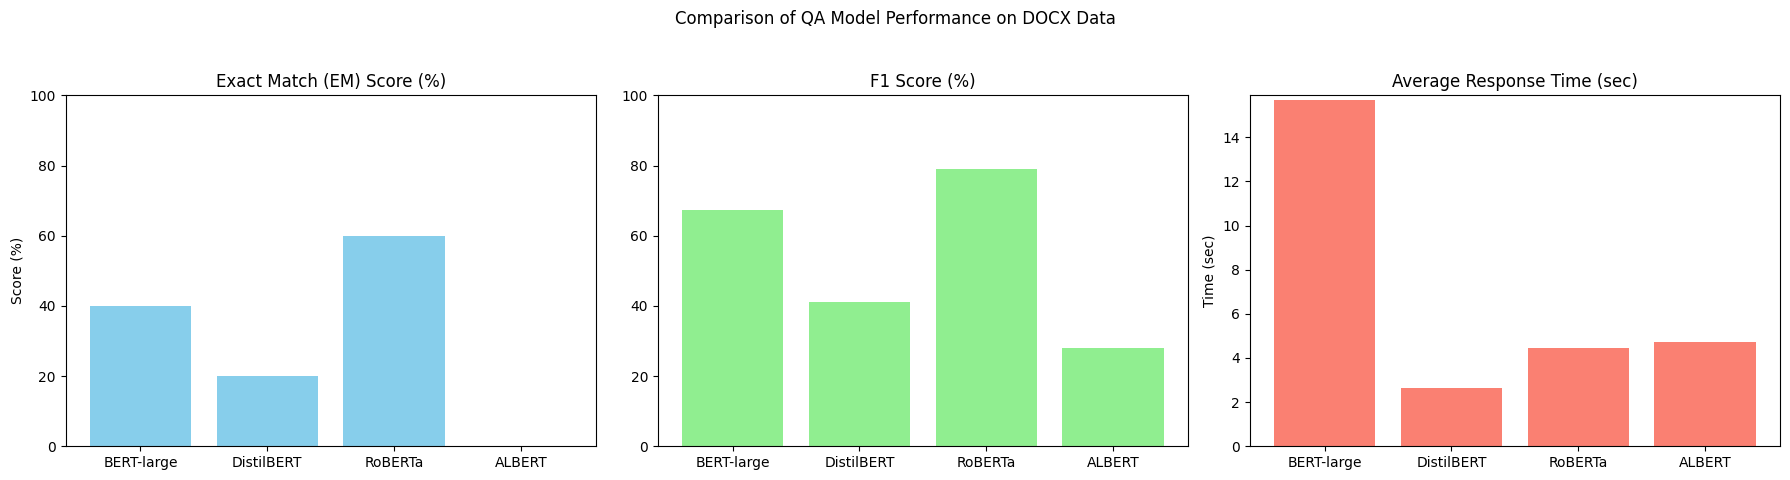

In [ ]:
# !pip install python-docx
# !pip uninstall torch torchvision -y
# !pip install torch torchvision
import os
import time
import re
import string
import collections
import matplotlib.pyplot as plt
import docx
from transformers import pipeline

# -------------------------------
# Text Extraction Functions
# -------------------------------
def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    paragraphs = [para.text for para in doc.paragraphs if para.text.strip() != '']
    return ' '.join(paragraphs).strip()

# -------------------------------
# QA Pipeline Setup
# -------------------------------
def setup_qa_pipeline(model_name):
    qa_pipeline = pipeline(
        "question-answering",
        model=model_name,
        tokenizer=model_name,
        max_length=512,
        truncation=True
    )
    return qa_pipeline

# -------------------------------
# Answer Extraction with Chunking
# -------------------------------
def get_answer(qa_pipeline, context, question, max_chunk_size=500):
    """
    Splits context into chunks and returns the answer with highest score.
    """
    best_answer = ""
    best_score = 0.0
    chunks = [context[i:i + max_chunk_size] for i in range(0, len(context), max_chunk_size)]

    for chunk in chunks:
        try:
            result = qa_pipeline(question=question, context=chunk)
            if isinstance(result, list):
                for res in result:
                    if res['score'] > best_score:
                        best_score = res['score']
                        best_answer = res['answer']
            else:
                if result['score'] > best_score:
                    best_score = result['score']
                    best_answer = result['answer']
        except Exception as e:
            print(f"Error processing chunk: {e}")
            continue
    return best_answer, best_score

# -------------------------------
# Evaluation Metrics (EM & F1)
# -------------------------------
def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)
    def white_space_fix(text):
        return ' '.join(text.split())
    def remove_punc(text):
        return ''.join(ch for ch in text if ch not in string.punctuation)
    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))

def compute_exact(gold_answer, pred_answer):
    return int(normalize_answer(gold_answer) == normalize_answer(pred_answer))

def compute_f1(gold_answer, pred_answer):
    gold_tokens = normalize_answer(gold_answer).split()
    pred_tokens = normalize_answer(pred_answer).split()
    common = collections.Counter(gold_tokens) & collections.Counter(pred_tokens)
    num_same = sum(common.values())
    if len(gold_tokens) == 0 or len(pred_tokens) == 0:
        return int(gold_tokens == pred_tokens)
    if num_same == 0:
        return 0
    precision = num_same / len(pred_tokens)
    recall = num_same / len(gold_tokens)
    return (2 * precision * recall) / (precision + recall)

# -------------------------------
# Benchmark Questions and Ground Truths
# -------------------------------
benchmark_questions = [
    {
        "question": "What is the title of the invention?",
        "ground_truth": "Quantum Computing System and Methods for Enhanced Qubit Stability and Error Correction"
    },
    {
        "question": "What is the focus of the invention?",
        "ground_truth": "improving qubit stability and refining error correction"
    },
    {
        "question": "What techniques are used for error correction?",
        "ground_truth": "topological codes and machine learning"
    },
    {
        "question": "How are quantum gates calibrated?",
        "ground_truth": "using real-time quantum state tomography feedback"
    },
    {
        "question": "What industrial applications are mentioned?",
        "ground_truth": "cryptography, pharmaceutical research, and optimization"
    }
]

# -------------------------------
# Main Evaluation and Plotting
# -------------------------------
def evaluate_models_on_docx(docx_path):
    context = extract_text_from_docx(docx_path)

    model_names = {
        "BERT-large": "bert-large-uncased-whole-word-masking-finetuned-squad",
        "DistilBERT": "distilbert-base-cased-distilled-squad",
        "RoBERTa": "deepset/roberta-base-squad2",
        "ALBERT": "twmkn9/albert-base-v2-squad2"  
    }

    avg_em_scores = {}
    avg_f1_scores = {}
    avg_response_times = {}

    for model_label, model_name in model_names.items():
        print(f"--------------Evaluating model: {model_label} ...")
        qa_pipeline_model = setup_qa_pipeline(model_name)

        total_em = 0
        total_f1 = 0
        total_time = 0
        num_questions = len(benchmark_questions)

        for entry in benchmark_questions:
            question = entry["question"]
            ground_truth = entry["ground_truth"]

            start_time = time.time()
            pred_answer, score = get_answer(qa_pipeline_model, context, question)
            elapsed = time.time() - start_time

            em = compute_exact(ground_truth, pred_answer)
            f1 = compute_f1(ground_truth, pred_answer)

            total_em += em
            total_f1 += f1
            total_time += elapsed

            print(f"Q: {question}")
            print(f"Ground Truth: {ground_truth}")
            print(f"Prediction: {pred_answer}")
            print(f"EM: {em}, F1: {f1:.2f}, Time: {elapsed:.2f} sec")
            print("-" * 50)

        avg_em_scores[model_label] = (total_em / num_questions) * 100  
        avg_f1_scores[model_label] = (total_f1 / num_questions) * 100  
        avg_response_times[model_label] = total_time / num_questions

    models = list(model_names.keys())
    em_values = [avg_em_scores[m] for m in models]
    f1_values = [avg_f1_scores[m] for m in models]
    response_times = [avg_response_times[m] for m in models]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    axes[0].bar(models, em_values, color='skyblue')
    axes[0].set_title('Exact Match (EM) Score (%)')
    axes[0].set_ylabel('Score (%)')
    axes[0].set_ylim(0, 100)

    axes[1].bar(models, f1_values, color='lightgreen')
    axes[1].set_title('F1 Score (%)')
    axes[1].set_ylim(0, 100)

    axes[2].bar(models, response_times, color='salmon')
    axes[2].set_title('Average Response Time (sec)')
    axes[2].set_ylabel('Time (sec)')
    axes[2].set_ylim(0, max(response_times) + 0.2)

    plt.suptitle('Comparison of QA Model Performance on DOCX Data')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# -------------------------------
# Run the Evaluation
# -------------------------------
if __name__ == "__main__":
    docx_file_path = r"/content/IPR activity-3.docx"
    evaluate_models_on_docx(docx_file_path)